<a href="https://colab.research.google.com/github/sanjit1995/Motorbikes_Classification/blob/master/MotorbikesClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt

In [2]:
images = []
labels = []

In [3]:
for foldername in os.listdir("/content/drive/My Drive/Colab Notebooks/data/MotorbikesClassifier"):
    print(foldername)
    filepath = "/content/drive/My Drive/Colab Notebooks/data/MotorbikesClassifier/" + str(foldername)
    for filename in os.listdir(filepath):
      print(filename)
      img = cv.imread(os.path.join(filepath, filename), 1)
      img = cv.resize(img, (32, 32))
      if img is not None:
        images.append(img)
        labels.append(str(foldername))
        images.append(cv.flip(img, flipCode=1))
        labels.append(str(foldername))

Commuter
hero-glamour.jpg
hero-hf-deluxe-eco.jpg
hero-xtreme-sports.jpg
honda-cb-unicorn-150.jpg
honda-dream-neo.jpg
mahindra-centuro-rockstar.jpg
mahindra-centuro.jpg
tvs-xl-100.jpg
hero-splendor-ismart-110.jpg
hero-achiever.jpg
hero-splendor-pro.jpg
tvs-victor.jpg
hero-glamour-125.jpg
bajaj-pulsar-150.jpg
hero-hf-dawn.jpg
hero-super-splendor.jpg
hero-passion-xpro.jpg
hero-passion-pro.jpg
honda-dream-yuga.jpg
triumph-speed-twin.jpg
hero-glamour-fi.jpg
bajaj-pulsar-180.jpg
suzuki-gixxer-sf.jpg
suzuki-gixxer-sf-250.jpg
bajaj-ct-110.jpg
suzuki-gixxer.jpg
cfmoto-300nk.jpg
bajaj-pulsar-220.jpg
suzuki-gixxer-250.jpg
revolt-rv400.jpg
revolt-rv300.jpg
benelli-leoncino-250.jpg
hero-splendor-ismart.jpg
tvs-radeon.jpg
honda-sp-125.jpg
hero-xtreme-160r.jpg
hero-passion-pro-i3s.jpg
bajaj-dominar-250.jpg
tvs-sport.jpg
honda-cb-shine-sp.jpg
honda-cb-shine.jpg
bajaj-pulsar-125.jpg
bajaj-platina-110.jpg
bajaj-ct-100.jpg
bajaj-platina-100.jpg
tvs-star-city-plus.jpg
tvs-apache-rtr-160.jpg
tvs-xl-hd.jpg


In [4]:
images_arr = np.asarray(images)
labels_arr = np.asarray(labels)

In [5]:
images_arr.shape, labels_arr.shape

((686, 32, 32, 3), (686,))

In [39]:
images_arr[1][24]

array([255,  84, 124, 251, 127, 155, 217, 253, 108,  61, 255, 255, 255,
       223,  82, 104, 191,  59, 153, 239,  33,  89, 247,  70, 137, 244,
       246,  70,  71, 255, 255, 255], dtype=uint8)

In [5]:
images_arr = images_arr / 255.0

In [7]:
labels_arr_new = [[i] for i in labels_arr]

In [ ]:
images_arr[1][24]

In [6]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
labels_arr = enc.fit_transform(labels_arr)

In [8]:
from sklearn.preprocessing import OneHotEncoder
encO = OneHotEncoder()
labels_arrO = encO.fit_transform(labels_arr_new).toarray()

In [ ]:
encO.fit_transform(labels_arr_new).toarray()

In [ ]:
labels_arrO

In [9]:
encO.categories_

[array(['Commuter', 'Cruiser', 'OffRoad', 'Scooter', 'Sports'],
       dtype=object)]

In [ ]:
labels_arr[119]

In [41]:
enc.classes_

array(['Commuter', 'Cruiser', 'OffRoad', 'Scooter', 'Sports'], dtype='<U8')

In [8]:
images_arr.shape, labels_arr.shape

((686, 32, 32, 3), (686,))

In [49]:
train_images = images_arr.reshape(len(images_arr), 32, 32, 1)

In [ ]:
train_images.shape

In [13]:
from sklearn.utils import shuffle
x_train, y_train = shuffle(images_arr, labels_arr)

In [17]:
x_train.shape, y_train.shape

((686, 32, 32, 3), (686,))

In [ ]:
image_size = (32, 32, 3)
from keras.applications.vgg16 import VGG16
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model

vgg = VGG16(input_shape=image_size, weights='imagenet', include_top=False)

for layer in vgg.layers:
  layer.trainable = False

x = Flatten()(vgg.output)
# x = Dense(512, activation='relu')(x)
x = Dense(128, activation='relu')(x)
prediction = Dense(5, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

model.summary()

model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

model.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.1, initial_epoch=3)

In [ ]:
from sklearn.externals import joblib
joblib.dump(model, "vgg-16_model.pkl")

In [ ]:
from sklearn.externals import joblib
model = joblib.load("vgg-16_model.pkl")

In [66]:
def getPrediction(path):
  test_img = cv.imread(path, 1)
  test_img = cv.resize(test_img, (32, 32))
  test_img = test_img / 255.0
  test_arr = test_img.reshape(1, 32, 32, 3)
  pred = model.predict(test_arr)
  pred_value = enc.inverse_transform(np.argmax(pred).ravel())[0]
  return pred_value

In [79]:
getPrediction("/content/test_commuter3.jpg")

'Commuter'

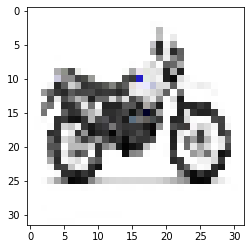

In [81]:
test_img = cv.imread("/content/test_offRoad.jpg", 1)
test_img = cv.resize(test_img, (32, 32))
plt.imshow(test_img)

In [34]:
test_img = test_img / 255.0

In [37]:
test_arr = test_img.reshape(1, 32, 32, 3)

In [38]:
test_arr.shape

(1, 32, 32, 3)

In [44]:
pred = model.predict(test_arr)

In [ ]:
list(np.argmax(pred))

In [65]:
enc.inverse_transform(np.argmax(pred).ravel())[0]

'Scooter'

In [63]:
x = enc.inverse_transform(np.argmax(pred).ravel())[0]

In [57]:
x

'Scooter'